In [2]:
import pandas as pd

# Load the CSV files
final_df = pd.read_csv('../Data/final.csv')  # Adjust the file path as needed
rfms_df = pd.read_csv('../Data/rfms_final_data.csv')  # Adjust the file path as needed
woe_results = pd.read_csv('../Data/woe_results.csv')

# Merge the DataFrames
# Assuming you want to merge on a common column (e.g., 'CustomerId')
merged_df = pd.merge(final_df, rfms_df, on='CustomerId', how='inner')  # Use 'outer', 'left', or 'right' as needed
# Merge df1 and df2 first on 'CustomerId'

# Merge the result with df3
#final_merged_df = pd.merge(merged_df, woe_results, on='CustomerId')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('../Data/merged_df.csv', index=False)
print("Merged data saved to '../Data/merged_df.csv'")

Merged data saved to '../Data/merged_df.csv'


In [3]:
import pandas as pd

# Load the CSV file
rfms_df = pd.read_csv('../Data/rfms_final_data.csv')  # Adjust the file path as needed

# Print the shape of the DataFrame
print("Shape of rfms_df:", rfms_df.shape)
import pandas as pd

# Load the CSV file
final_df = pd.read_csv('../Data/final.csv')  # Adjust the file path as needed

# Print the shape of the DataFrame
print("Shape of final_df:", final_df.shape)

merged_df = pd.merge(final_df, rfms_df, on='CustomerId', how='inner')  # You can adjust 'how' to 'left', 'right', or 'outer' as needed

# Print the shape of the merged DataFrame
print("Shape of merged_df:", merged_df.shape)

# Optionally, display the first few rows of the merged DataFrame
print(merged_df.head())

Shape of rfms_df: (3742, 6)
Shape of final_df: (95662, 24)
Shape of merged_df: (95662, 29)
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  CurrencyCode  CountryCode  ProviderId  ProductId  \
0  CustomerId_4406             0          256           5          1   
1  CustomerId_4406             0          256           3         19   
2  CustomerId_4683             0          256           5          0   
3   CustomerId_988             0          256           0         11   
4   CustomerId_988             0          256           3         19   

 

In [4]:
# Perform a left join to keep all rows from rfms_df and merge matching rows from final_df
merged_df = pd.merge(rfms_df, final_df, on='CustomerId', how='left')

# Check the shape of the merged dataframe
print(f"Shape of merged_df: {merged_df.shape}")

Shape of merged_df: (95662, 29)


In [5]:
df=pd.read_csv('../Data/merged_df.csv')
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'total_transaction_amount', 'average_transaction_amount',
       'transaction_count', 'std_transaction_amount', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_year', 'Recency',
       'Frequency', 'Monetary', 'Score', 'UserLabel'],
      dtype='object')

In [6]:

df = df.drop(columns=['Value','TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','Recency', 'Frequency',
                       'Monetary', 'Score', 'Recency', 'Frequency','std_transaction_amount',
       'Monetary', 'Score',
                      'ProviderId', 'ProductId', 'FraudResult','CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'Amount','TransactionStartTime'])
df.columns

Index(['PricingStrategy', 'total_transaction_amount',
       'average_transaction_amount', 'transaction_count', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_year',
       'UserLabel'],
      dtype='object')

In [7]:
import sys
import pandas as pd
sys.path.append('../Scripts')
from Model import ModelSelector

d:\10 ACADAMY KIFIYA\Week_6\Bati-Bank-Credit-Scoring-Model\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:

model_selector = ModelSelector(df)



In [9]:
model_selector.split_data()


Numeric columns: Index(['PricingStrategy', 'total_transaction_amount',
       'average_transaction_amount', 'transaction_count', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_year'],
      dtype='object')
Categorical columns: Index(['UserLabel'], dtype='object')


In [10]:
model_selector.train_models()

    max_depth  min_samples_split  n_estimators              Model  \
0         NaN                2.0            50      Random Forest   
1         NaN                2.0           100      Random Forest   
2         NaN                2.0           200      Random Forest   
3         NaN                5.0            50      Random Forest   
4         NaN                5.0           100      Random Forest   
..        ...                ...           ...                ...   
58        5.0                NaN           100  Gradient Boosting   
59        5.0                NaN           200  Gradient Boosting   
60        7.0                NaN            50  Gradient Boosting   
61        7.0                NaN           100  Gradient Boosting   
62        7.0                NaN           200  Gradient Boosting   

    learning_rate     Score  
0             NaN  0.998340  
1             NaN  0.998471  
2             NaN  0.998510  
3             NaN  0.998158  
4             NaN  0.

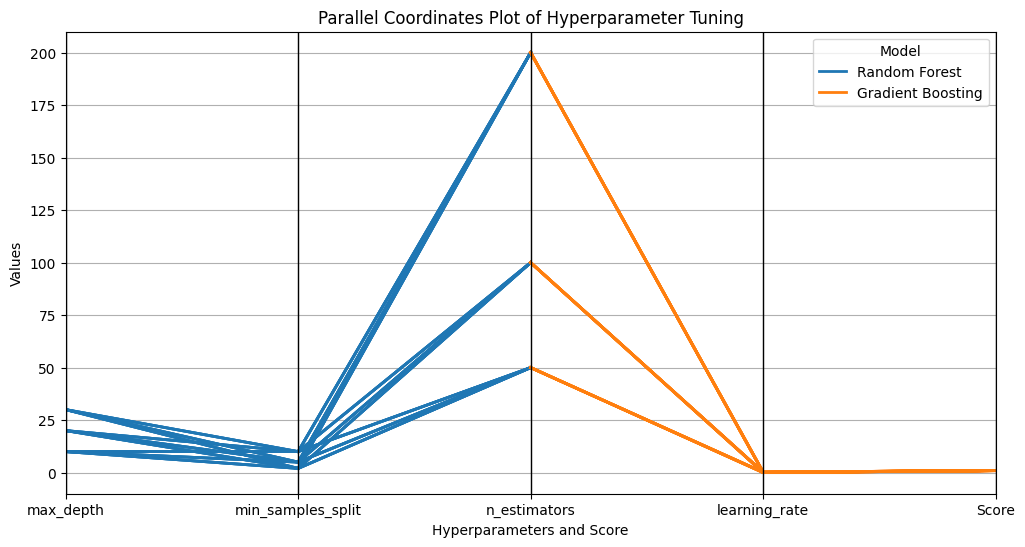

In [11]:
model_selector.hyperparameter_tuning()


In [14]:
def create_shap_summary_plot(self):
            """ Create a SHAP summary plot for the best model """
            # Select the best model
            best_model = self.models['Gradient Boosting']  # or whichever is the best model

            # Initialize SHAP explainer
            explainer = shap.Explainer(best_model, self.X_train)
            shap_values = explainer(self.X_test)

            # Create SHAP summary plot
            plt.figure(figsize=(12, 6))
            shap.summary_plot(shap_values, self.X_test, plot_type="bar")
            plt.title('SHAP Summary Plot')
            plt.savefig('shap_summary_plot.png')
            plt.show()
model_selector.create_shap_summary_plot()

AttributeError: 'ModelSelector' object has no attribute 'create_shap_summary_plot'

In [13]:
model_selector.evaluate_models() 
model_selector.display_results()

ValueError: pos_label=Good is not a valid label. It should be one of [0, 1]